Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

1. The array after the process is done is A=[1,5,6,2,3,4,7,9,8]. This is achieved by following the partition process in Cormen: take 7 as the pivot, and then compare each element from the first (1) to the second to last (4) with 7, then make changes accordingly. 

2. The value of i is i=5 after the process is done. 7 (the pivot) is inserted into A[i+1]=A[6] after all the comparisons are done.

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [11]:
def partition(A,p,r): #Assume that we sort the entire array. The value of p as the input is therefore 0, and the value of r is len(A)-1
    x = A[r] #r is len(A)-1, not len(A) so this is not out of range
    i = p-1 #the index of numbers smaller than the pivot
    for j in range(p,r): #we only consider from the beginning up to the second to last element, since the last element is the pivot
        if A[j] <= x: 
            i += 1 #if an element is smaller than the pivot, increment the index of small numbers by 1, and exchange. If it's larger, do nothing
            A[i],A[j]=A[j],A[i]
    A[i+1],A[r]=A[r],A[i+1] #swap the pivot to the place just after the small number array
    return  i+1
    
    """
    Assume r<len(A) and p>=0
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [13]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [36]:
def quick_sort(A,p,r):
    if p<r:
        q = partition(A,p,r) #partition to find the point to split up A
        quick_sort(A,p,q-1) #recursively calls quick sort on the two split arrays
        quick_sort(A,q+1,r)
        return A 
    else:
        return A #if there's only one element in the list to be sorted, just return the list
    # YOUR CODE HERE
    #raise NotImplementedError()

In [37]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [43]:
#First, we create a list of lists that contains the two required characteristics above: all elements have same value, or decreasing order. The lists inside this list of lists will have different numbers of elements.
import random
size = [i for i in range(0,500,5)] #create different lengths for our element lists

#create all same element lists: Since the value of the elements does not matter (what matters is the relationship between them), I leave all values to be 1.
same_list = [[] for i in range(len(size))]
for i in range (len(size)):
    same_list[i]=[1 for j in range(size[i])]
    
#create inverse lists:
inverse_list=[[] for i in range(len(size))]
for i in range(len(size)):
    inverse_list[i]=[j for j in range(size[i],0,-1)]


In [54]:
#Now, we record the running time of the algorithm on these lists. 
import time
time_same = [] #create empty lists to store run time later on
time_inverse=[]
for i in same_list:
    start = time.time()
    quick_sort(i,0,len(i)-1)
    end = time.time()
    time_taken = end - start
    time_same.append(time_taken) #we now have the list of runtime of quick sort for list with all similar elements

#Similarly:
for i in inverse_list:
    start2 = time.time()
    quick_sort(i,0,len(i)-1)
    end2 = time.time()
    time_taken2 = end2 - start2
    time_inverse.append(time_taken2)


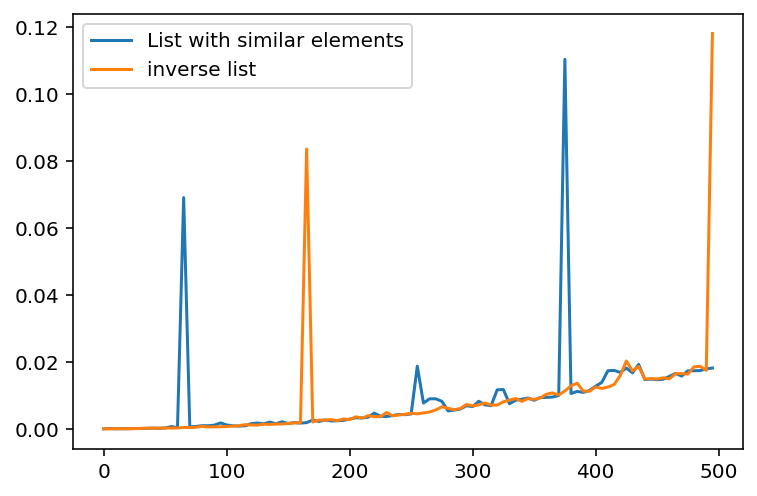

In [55]:
import matplotlib.pyplot as plt #now we graph the run time
plt.plot(size,time_same)
plt.plot(size,time_inverse)
plt.legend(["List with similar elements",'inverse list'])

From the above plot, we see that the running time of quick sort for both types  of lists are relatively similar. This is quite in line with theoretical benchmarks: For lists that are inverse, the partition process which chooses the last element as the pivot will split the array into one blank array and one array with length(n-1) (the pivot will eventually be moved to the beginning, and the recursion continues with the left array, which is blank, and the right array which has length of n-1). In this case, i=0. This is a "bad split", and the subsequent splits during the recursion will also be bad splits since the input list is perfectly inversed. And as mentioned in Cormen et al., the recurrence for this case becomes T(n-1) + T(0) + $\theta(n)$ = T(n-1) + $\theta(n)$, which has the solution T(n)=$\theta(n^2)$. Therefore, the inverse list would trigger a worst case scenario.

Similarly, for a list with similar elements, the partition process will return one blank array (on the right) and one array with length(n-1) on the left. This is because in the partition process, we trigger the swaps and increment i when the element is $<=$ the pivot. Thus, in this case, i=n-1. This is a bad split. Since all of the elements in the input lists are the same, the subsequent splits will also be bad splits. Therefore, similar to above, the recurrence becomes T(0) + T(n-1) + $\theta(n)$ = T(n-1) + $\theta(n)$, which has the solution T(n)=$\theta(n^2)$. Therefore, the same_list would also trigger a worst case scenario.